### Problem Statment 
These data is the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
Categorize this various wine based on their features using unsupervied machine learning clustering algorithm.
This dataset is taken from kaggal.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import pairwise
from sklearn import preprocessing
from pandas.plotting import parallel_coordinates

In [3]:
wine_data = pd.read_csv('wine-clustering.csv')
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [53]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [55]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [56]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Explanatory Data Analysis

<AxesSubplot:>

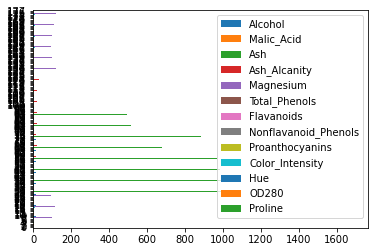

In [63]:
wine_data.plot.barh()

<AxesSubplot:xlabel='Malic_Acid', ylabel='Alcohol'>

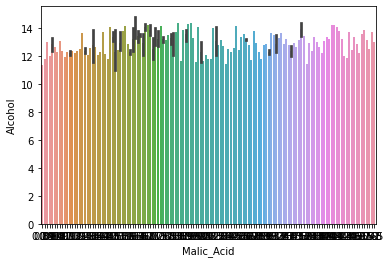

In [64]:
sns.barplot(x = "Malic_Acid", y = "Alcohol", data = wine_data)

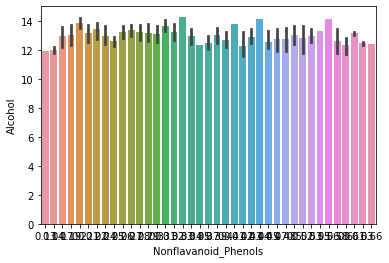

In [65]:
sns.barplot(x = "Nonflavanoid_Phenols", y = "Alcohol", data = wine_data)

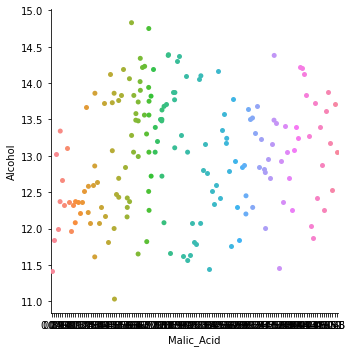

In [67]:
sns.catplot(x = "Malic_Acid", y = "Alcohol", data = wine_data)

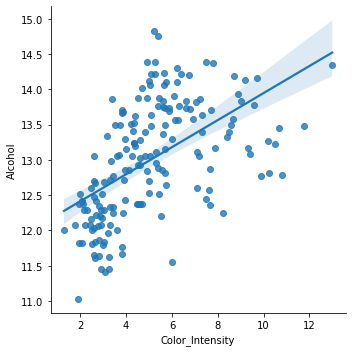

In [69]:
sns.lmplot(x = "Color_Intensity", y ="Alcohol", data = wine_data)

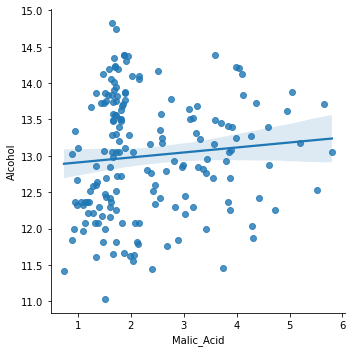

In [70]:
sns.lmplot(x = "Malic_Acid", y ="Alcohol", data = wine_data)

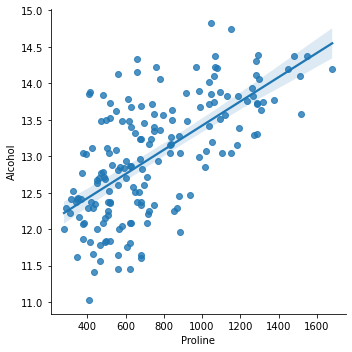

In [71]:
sns.lmplot(x = "Proline", y ="Alcohol", data = wine_data)

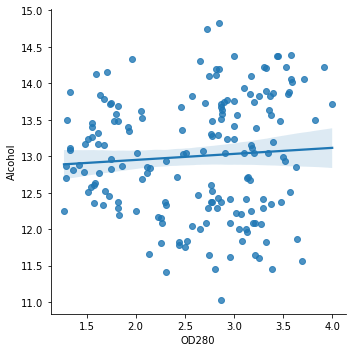

In [72]:
sns.lmplot(x = "OD280", y ="Alcohol", data = wine_data)

### K-mean Clustering
Training model initally with 2 clusters to check the results

In [73]:
km = KMeans(n_clusters=2)
km.fit(wine_data)

KMeans(n_clusters=2)

In [74]:
km.cluster_centers_

array([[1.27028455e+01, 2.54455285e+00, 2.33910569e+00, 2.04081301e+01,
        9.68130081e+01, 2.06211382e+00, 1.64146341e+00, 3.92682927e-01,
        1.45406504e+00, 4.85138211e+00, 9.08617886e-01, 2.40821138e+00,
        5.65869919e+02],
       [1.36665455e+01, 1.87072727e+00, 2.42781818e+00, 1.74527273e+01,
        1.06290909e+02, 2.81618182e+00, 2.89654545e+00, 2.92909091e-01,
        1.89690909e+00, 5.52036364e+00, 1.06665455e+00, 3.06672727e+00,
        1.15172727e+03]])

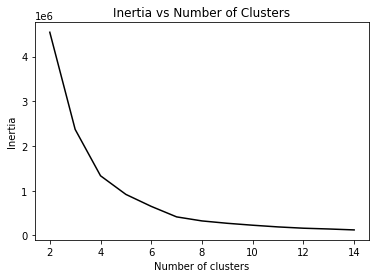

In [75]:
inertias = []

for n_clusters in range(2, 15):
    km = KMeans(n_clusters=n_clusters).fit(wine_data)
    inertias.append(km.inertia_)
    
plt.plot(range(2, 15), inertias, 'k')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");

In [6]:
for n_clusters in range(2, 9):
    km = KMeans(n_clusters=n_clusters)
    km.fit(wine_data)
    
    # Predict the cluster for each data point
    preds = km.predict(wine_data)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(wine_data, preds, metric='euclidean')
    print('For n_clusters = {}, the average silhouette_score is : {}'
          .format(n_clusters, score.round(5)))

For n_clusters = 2, the average silhouette_score is : 0.65685
For n_clusters = 3, the average silhouette_score is : 0.57114
For n_clusters = 4, the average silhouette_score is : 0.56059
For n_clusters = 5, the average silhouette_score is : 0.549
For n_clusters = 6, the average silhouette_score is : 0.56388
For n_clusters = 7, the average silhouette_score is : 0.56217
For n_clusters = 8, the average silhouette_score is : 0.54068


### Scaling Data

In [7]:
standard_scaler = StandardScaler()
wine_data_scaled = pd.DataFrame(standard_scaler.fit_transform(wine_data),
                                          columns=wine_data.columns)
wine_data_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


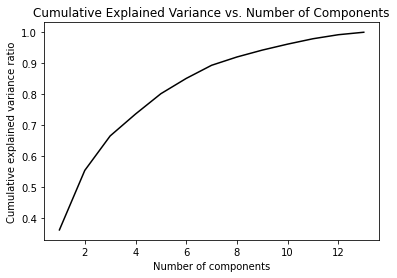

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=wine_data_scaled.shape[1])

customers_pca_transformed = pca.fit_transform(wine_data_scaled)

plt.plot(range(1, wine_data_scaled.shape[1]+1), pca.explained_variance_ratio_.cumsum(), 'k')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("Cumulative Explained Variance vs. Number of Components");

In [9]:
pca7D = PCA(n_components=7)

wine_pca_7D = pca7D.fit_transform(wine_data_scaled)

In [25]:
wine_pca_7D

array([[ 3.31675081, -1.44346263, -0.16573904, ...,  0.69304284,
        -0.22388013,  0.59642655],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.25765463,
        -0.92712024,  0.05377561],
       [ 2.51674015, -1.0311513 ,  0.98281867, ..., -0.25103312,
         0.54927605,  0.42420545],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  1.271355  ,
         0.27306792,  0.67923541],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  0.81395522,
         1.17878298,  0.63397527],
       [-3.20875816, -2.76891957,  1.01391366, ..., -0.89519259,
         0.29609218,  0.00574126]])

### Finding Clusters

In [10]:
for n_clusters in range(2, 9):
    km = KMeans(n_clusters=n_clusters)
    km.fit(wine_pca_7D)
    
    # Predict the cluster for each data point
    preds = km.predict(wine_pca_7D)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(wine_pca_7D, preds, metric='euclidean')
    print('For n_clusters = {}, the average silhouette_score is : {}'
          .format(n_clusters, score.round(5)))

For n_clusters = 2, the average silhouette_score is : 0.30263
For n_clusters = 3, the average silhouette_score is : 0.32764
For n_clusters = 4, the average silhouette_score is : 0.28679
For n_clusters = 5, the average silhouette_score is : 0.2734
For n_clusters = 6, the average silhouette_score is : 0.17453
For n_clusters = 7, the average silhouette_score is : 0.24436
For n_clusters = 8, the average silhouette_score is : 0.1798


In [12]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(wine_pca_7D)
y_pred = kmeans.predict(wine_pca_7D)

centroids = kmeans.cluster_centers_

In [13]:
# Invert PCA
scaled_centers = pca7D.inverse_transform(centroids)

# Invert standard scaler
true_centers = standard_scaler.inverse_transform(scaled_centers)

In [14]:
wines = pd.DataFrame(true_centers, columns=wine_data.columns, 
                                 index=['wines 1', 'wines 2', 
                                        'wines 3'])
wines

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
wines 1,13.132415,3.289850,2.416114,21.255834,98.717302,1.656188,0.850773,0.454184,1.146767,7.195383,0.682594,1.714049,627.048223
wines 2,13.697576,2.016943,2.466410,17.470860,107.965195,2.877175,2.972090,0.289532,1.922289,5.497779,1.078676,3.140954,1084.623240
wines 3,12.232417,1.892879,2.232320,20.043987,92.701161,2.241224,2.054631,0.358394,1.623276,2.961741,1.057474,2.811144,518.783073


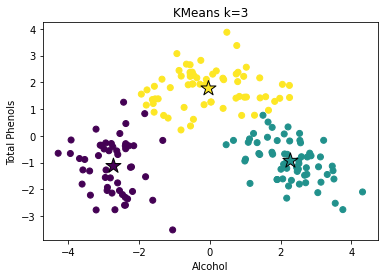

In [16]:
# Muestro todos los puntos
plt.scatter(wine_pca_7D[:,0], wine_pca_7D[:,1], c=y_pred) 

# Muestro los centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", s=250, c=[0,1,2], edgecolors="k") 

plt.xlabel("Alcohol")
plt.ylabel("Total Phenols")
plt.title("KMeans k=3")
plt.show() 

### Nonhierarchical Clustering: K-Means Clustering

In [42]:
n_clusters = 6
km = KMeans(n_clusters=n_clusters, n_init=10)
km.fit(wine_data_scaled)

centroids = km.cluster_centers_

In [44]:
# calculate the distances of each data point to the cluster centers
distances = km.transform(wine_data_scaled)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': km.labels_}, 
    index=wine_data_scaled.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (17 members): 104.18 within cluster 
Cluster 1 (50 members): 316.43 within cluster 
Cluster 2 (15 members): 127.96 within cluster 
Cluster 3 (22 members): 124.56 within cluster 
Cluster 4 (29 members): 184.92 within cluster 
Cluster 5 (45 members): 192.75 within cluster 


In [45]:
centroids = pd.DataFrame(km.cluster_centers_, columns=wine_data_scaled.columns)
print(centroids)

    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0 -0.829118    0.933151 -0.182936      0.273541  -0.498130       0.481933   
1  0.177115    0.906507  0.215969      0.551040  -0.077345      -0.990100   
2  0.308876   -0.470688  1.382266      0.670153   1.296028       0.711789   
3 -1.091727   -0.612029  0.085839      0.546126  -0.616967      -0.600326   
4 -0.735107   -0.847026 -1.233865     -0.376427  -0.405556       0.029380   
5  1.020938   -0.357782  0.121580     -0.963397   0.405099       0.955344   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.496811             -0.237713         0.721933        -0.920293   
1   -1.227118              0.713487        -0.761279         0.954384   
2    0.825994             -0.224442         0.485504        -0.271693   
3   -0.346548              1.032576        -0.473045        -0.920155   
4    0.081743             -0.659563         0.000238        -0.761094   
5    1.017194         

    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0 -0.829118    0.933151 -0.182936      0.273541  -0.498130       0.481933   
1  0.177115    0.906507  0.215969      0.551040  -0.077345      -0.990100   
2  0.308876   -0.470688  1.382266      0.670153   1.296028       0.711789   
3 -1.091727   -0.612029  0.085839      0.546126  -0.616967      -0.600326   
4 -0.735107   -0.847026 -1.233865     -0.376427  -0.405556       0.029380   
5  1.020938   -0.357782  0.121580     -0.963397   0.405099       0.955344   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.496811             -0.237713         0.721933        -0.920293   
1   -1.227118              0.713487        -0.761279         0.954384   
2    0.825994             -0.224442         0.485504        -0.271693   
3   -0.346548              1.032576        -0.473045        -0.920155   
4    0.081743             -0.659563         0.000238        -0.761094   
5    1.017194         

(-0.5, 7.5)

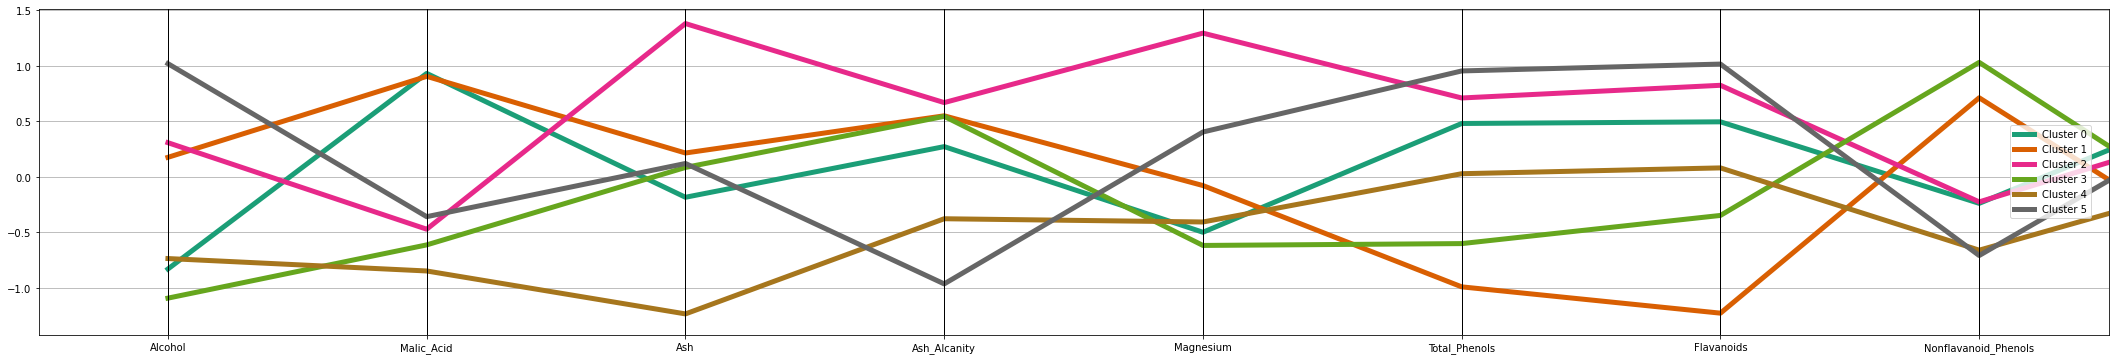

In [46]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
print(centroids)
plt.figure(figsize=(10,6))
#fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [49]:
print(pd.DataFrame(pairwise.pairwise_distances(km.cluster_centers_, metric='euclidean')))

          0         1         2         3         4         5
0  0.000000  4.283351  3.498990  3.013905  2.579143  3.770301
1  4.283351  0.000000  4.943752  3.682039  4.598380  5.297601
2  3.498990  4.943752  0.000000  3.931902  3.901072  2.666880
3  3.013905  3.682039  3.931902  0.000000  2.604194  4.808937
4  2.579143  4.598380  3.901072  2.604194  0.000000  3.691954
5  3.770301  5.297601  2.666880  4.808937  3.691954  0.000000


In [50]:
pd.DataFrame(pairwise.pairwise_distances(km.cluster_centers_, metric='euclidean')).sum(axis=0)

0    17.145691
1    22.805124
2    18.942597
3    18.040978
4    17.374744
5    20.235674
dtype: float64

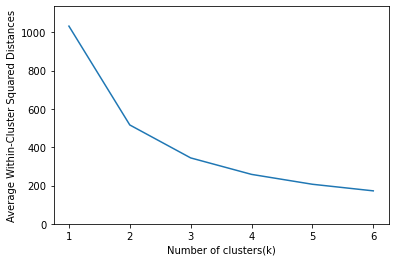

In [52]:
inertia = []
for n_clusters in range(1, 7):
    km = KMeans(n_clusters=n_clusters, random_state=0).fit(wine_data_scaled)
    inertia.append(kmeans.inertia_ / n_clusters)
    
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})

ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

### Conclusion
- Based on the inertia and silhouette score, taking 3 clusters is recommendable.
- In Nonhierarchical Clustering: K-Means Clustering, initially I have trained using 6 clusters but plotting it shows a lot of chaos and interrelation.